In [1]:
import subprocess

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
from matplotlib.pyplot import figure, show, subplots
from matplotlib import pyplot as plt

import numpy as np

In [2]:
def ARCiS_initialize(atmosphere_key):
      splits = atmosphere_key.split("_")
      distance = int(splits[-1])
      
      config_ARCiS_loc = "config/config_ARCiS.in"
      save_location = f"/dataserver/users/formingworlds/borgmann/ARCiS_retrievals/{atmosphere_key}"
      atmosphere_file_loc = f"/Users/users/borgmann/Documents/masterproject/LIFEredoxsurvey/output/ARCiS/input_spectra/textfiles/ARCiS_input_{atmosphere_key}.txt"
      atmosphere_key_us = atmosphere_key.replace(".","_")
      command = f"ARCiS {config_ARCiS_loc} -o {save_location} -s obs1:file={atmosphere_file_loc} -s distance={distance}"
      prompt = (
        "ssh -n -T norma1;"
        "cd .. ;"
        f"tmux new-session -d -s '{atmosphere_key}'; "
        f"tmux send-keys -t {atmosphere_key_us}:0 'module unload ARCiS' C-m ;"
        f"tmux send-keys -t {atmosphere_key_us}:0 'module load ARCiS' C-m ;"
        f"tmux send-keys -t {atmosphere_key_us}:0 'module unload cfitsio' C-m ;"
        f"tmux send-keys -t {atmosphere_key_us}:0 'module load cfitsio' C-m ;"
        f"tmux send-keys -t {atmosphere_key_us}:0 'export OMP_NUM_THREADS=8' C-m ;"
        f"tmux send-keys -t {atmosphere_key_us}:0 '{command}' C-m"
        )
      subprocess.run(prompt, shell=True, check=True) 

In [33]:
ARCiS_initialize("4.0_1.33_5")

We encourage everyone who runs jobs on these machines to start using Condor.
Instructions can be found in the following Howto on our intranet:
How to use Condor
- ssh condormaster



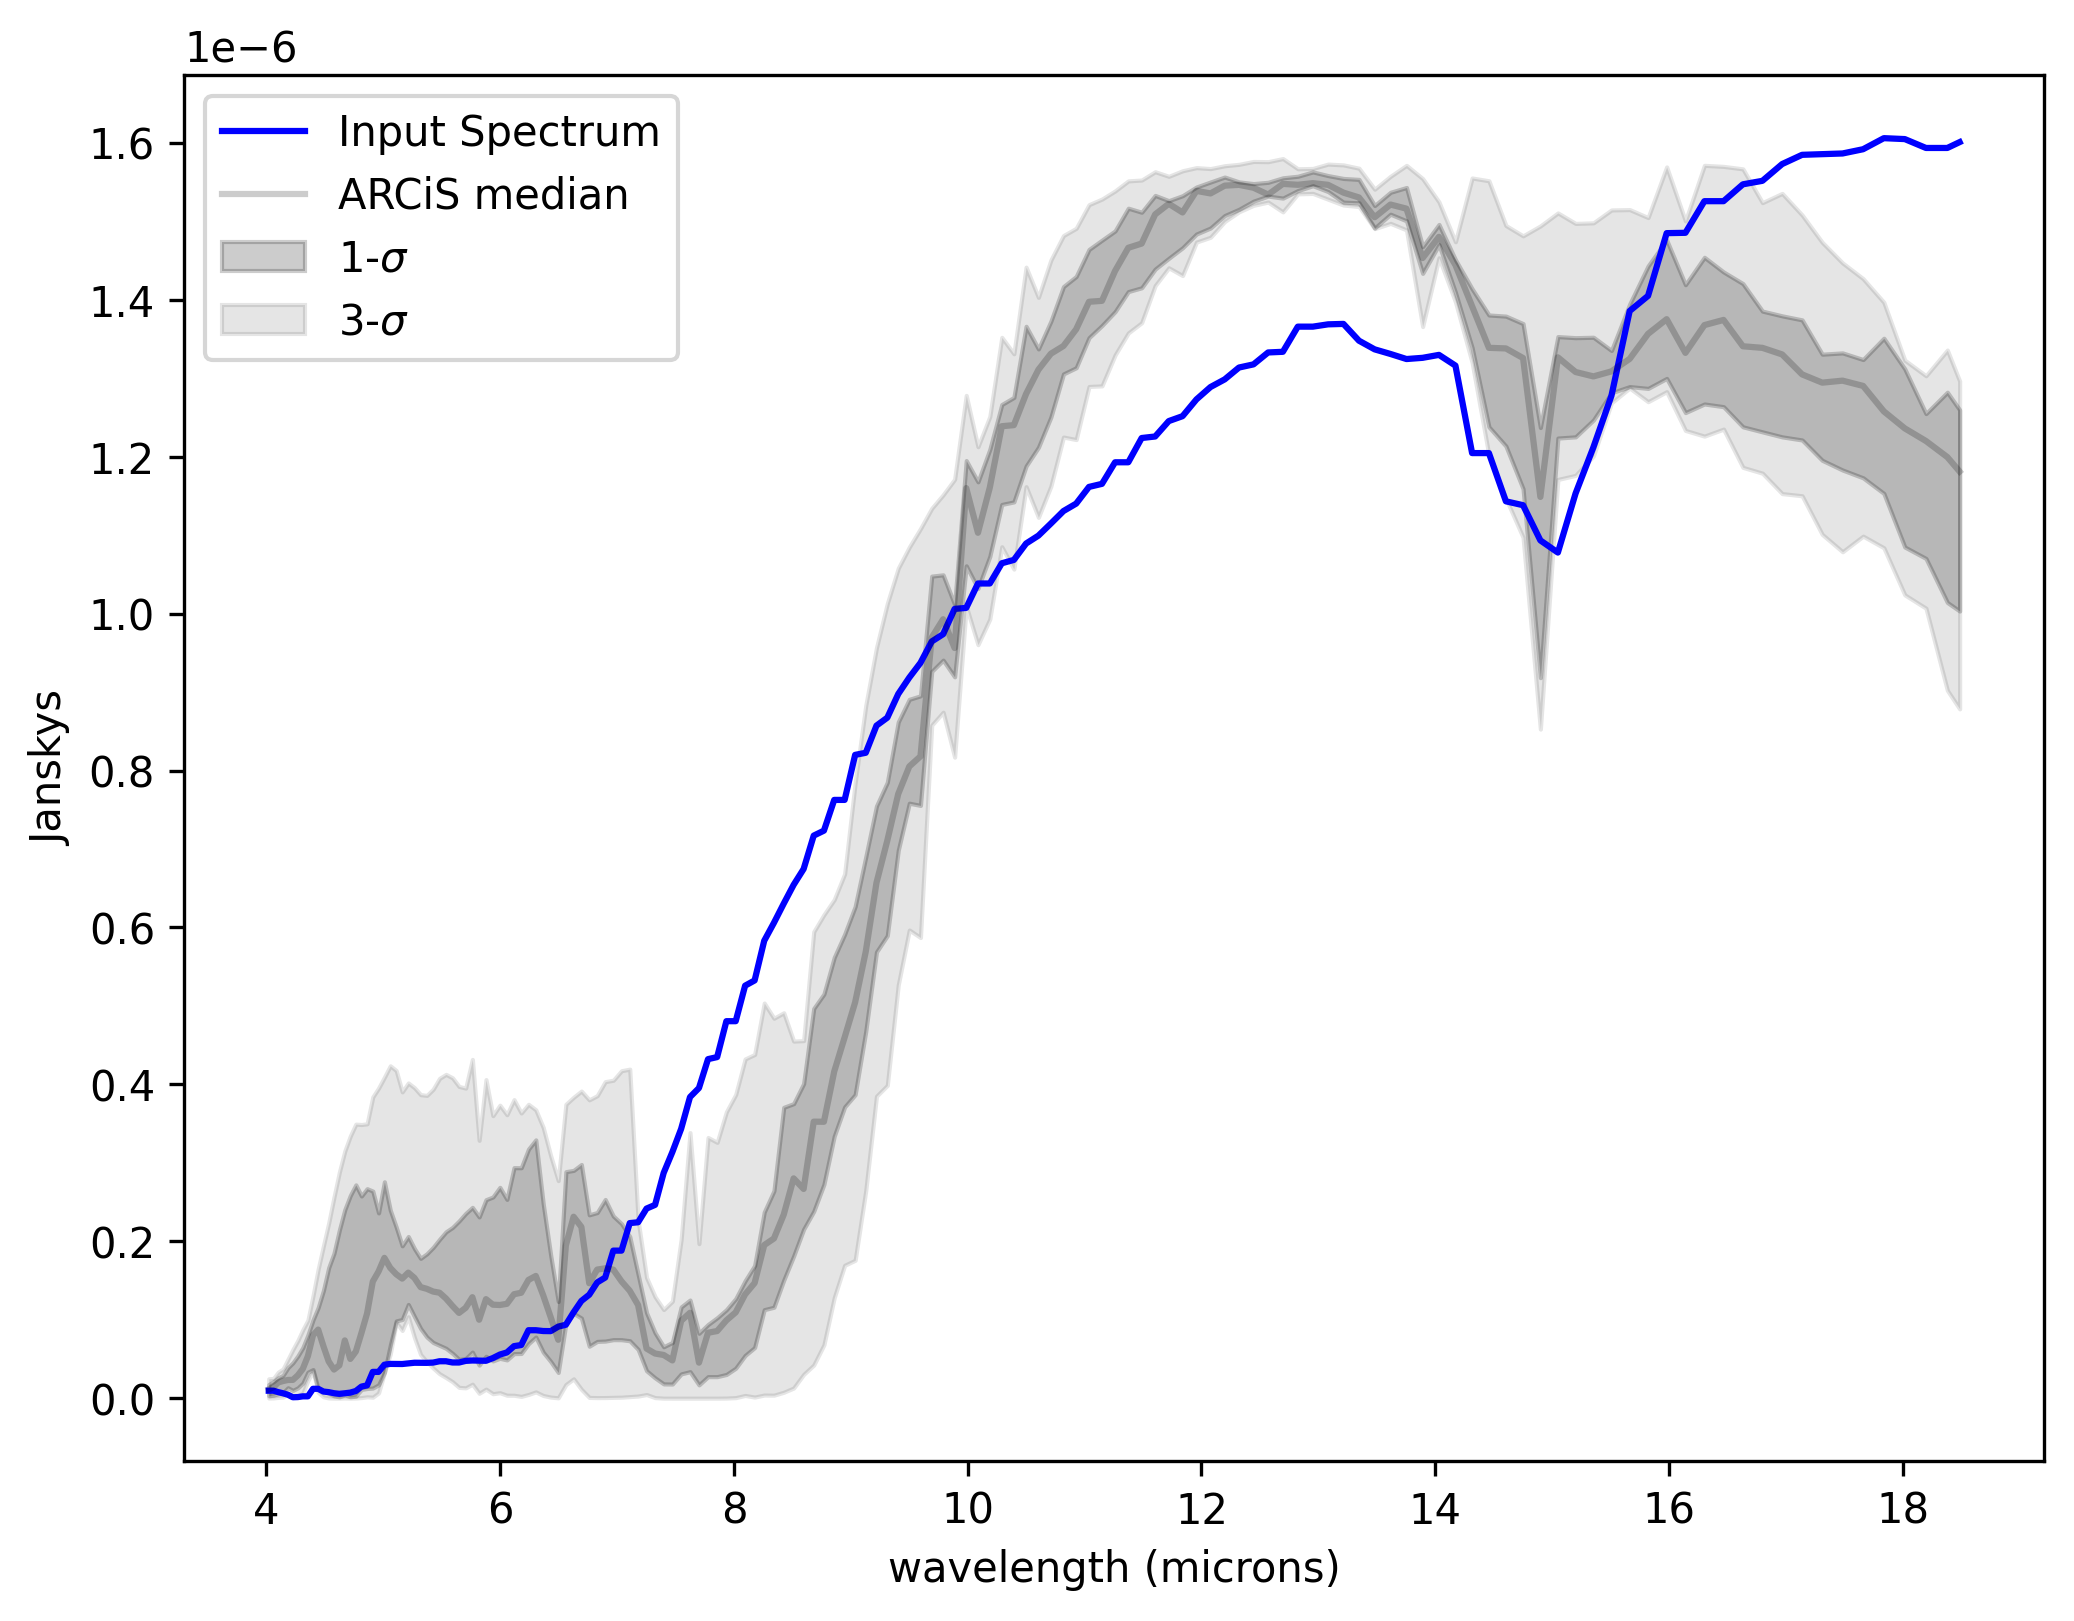

In [28]:
retrieval_folder = "/dataserver/users/formingworlds/borgmann/ARCiS_retrievals/4.0_0.5_5"
input_file = "../output/ARCiS/input_spectra/textfiles/ARCiS_input_-1.33_0.5_5.txt"
input_lambda = np.genfromtxt(input_file,usecols=0)
input_jansky = np.genfromtxt(input_file,usecols=1)

ARCiS_lambda = np.genfromtxt(retrieval_folder + "/emis_limits",usecols=0)
ARCiS_jansky = np.genfromtxt(retrieval_folder + "/emis_limits",usecols=4)
ARCiS_minsigma = np.genfromtxt(retrieval_folder + "/emis_limits",usecols=3)
ARCiS_plussigma = np.genfromtxt(retrieval_folder + "/emis_limits",usecols=5)
ARCiS_min3sigma = np.genfromtxt(retrieval_folder + "/emis_limits",usecols=1)
ARCiS_plus3sigma = np.genfromtxt(retrieval_folder + "/emis_limits",usecols=7)


fig = figure(figsize=(8,6))
frame1 = fig.add_subplot(1,1,1)
frame1.plot(input_lambda,input_jansky,color='blue', label='Input Spectrum')
frame1.plot(ARCiS_lambda,ARCiS_jansky,color='black',label='ARCiS median',alpha=0.2)
frame1.fill_between(ARCiS_lambda,
                 ARCiS_minsigma,
                 ARCiS_plussigma,
                 color='black', alpha=0.2, label='1-$\sigma$')
frame1.fill_between(ARCiS_lambda,
                 ARCiS_min3sigma,
                 ARCiS_plus3sigma,
                 color='black', alpha=0.1, label='3-$\sigma$')

frame1.set_xlabel('wavelength (microns)')
frame1.set_ylabel('Janskys')
frame1.legend()

TypeError: len() of unsized object

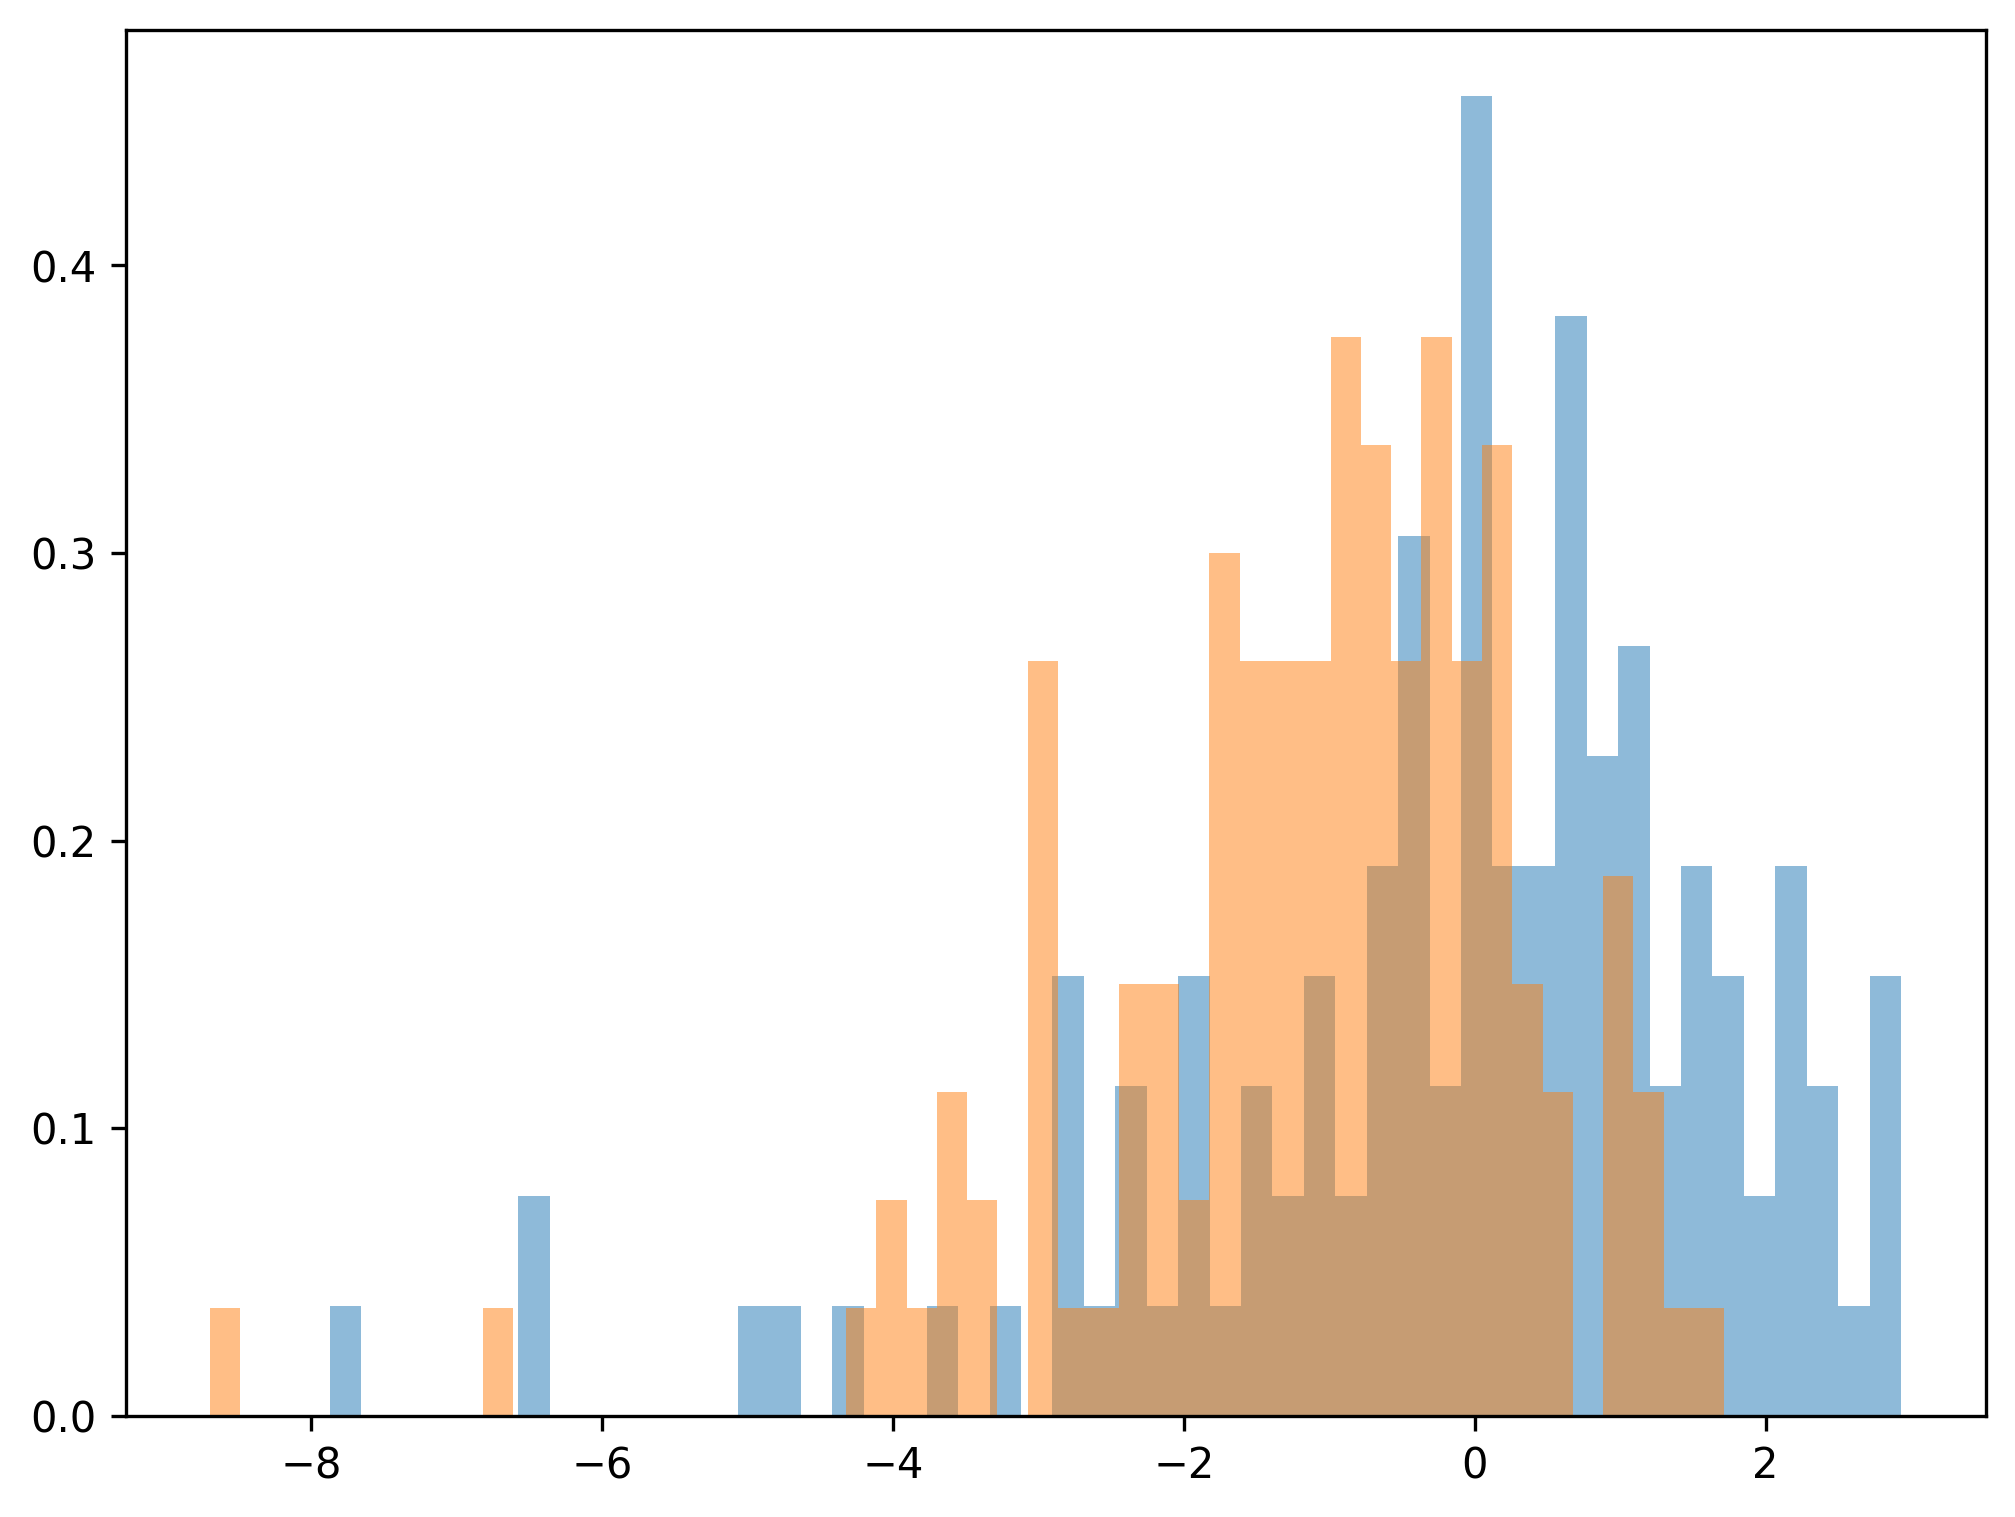

In [25]:
retrieval_folder = "/dataserver/users/formingworlds/borgmann/ARCiS_retrievals/-1.33_0.5_5"
CO2_min133 = np.genfromtxt(retrieval_folder + "/pew_output.dat",usecols=3)
retrieval_folder = "/dataserver/users/formingworlds/borgmann/ARCiS_retrievals/-4.0_0.5_5"
CO2_min40 = np.genfromtxt(retrieval_folder + "/pew_output.dat",usecols=3)
retrieval_folder = "/dataserver/users/formingworlds/borgmann/ARCiS_retrievals/1.33_0.5_5"
CO2_133 = np.genfromtxt(retrieval_folder + "/pew_output.dat",usecols=3)
retrieval_folder = "/dataserver/users/formingworlds/borgmann/ARCiS_retrievals/4.0_0.5_5"
CO2_40 = np.genfromtxt(retrieval_folder + "/pew_output.dat",usecols=3)

fig = figure(figsize=(8,6))
frame1 = fig.add_subplot(1,1,1)
#frame1.step(range(len(CO2_min133)),CO2_min133)
frame1.hist(CO2_min133,bins=50,density=True,label='-1.33',alpha=0.5)
frame1.hist(CO2_min40,bins=50,density=True,label='-4.0',alpha=0.5)
frame1.hist(CO2_133,bins=50,density=True,label='4.0',alpha=0.5)
frame1.set_xlabel('count')
frame1.set_ylabel('posterior')

frame1.legend()


# ARCiS_titles = ["H2O","CO2","CO","CH4","O2","SO2","N2","H2S","H2","S2"]
# print(ARCiS_titles)
# ARCiS_molecules = np.genfromtxt(retrieval_folder + "/mixingratios.dat",skip_header=1)[-1][2:]
# print(ARCiS_molecules)